In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("sample_data/boston_housing.csv")

- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per $10,000
- PTRATIO : pupil-teacher ratio by town
- B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in $1000's
- reference : https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [3]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<AxesSubplot:>

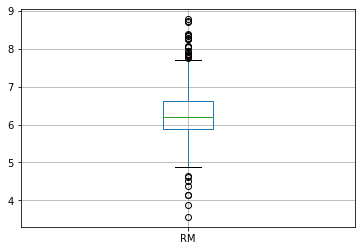

In [5]:
# check outliers
df.boxplot("RM")    # df.boxplot("RM", return_type="both")

<AxesSubplot:>

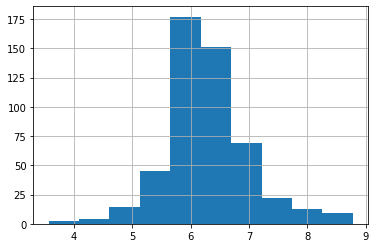

In [6]:
# check outliers
df["RM"].hist()

In [7]:
# remove out of iqr
rm_q1 = df["RM"].quantile(0.25) # 5.8855
rm_q3 = df["RM"].quantile(0.75) # 6.6235
rm_iqr = rm_q3 - rm_q1          # 0.738
rm_prep = (df["RM"] < rm_q3 + rm_iqr * 1.5) & (df["RM"] > rm_q1 - rm_iqr * 1.5) # pd.Series with boolean type
df_rm_prep = df[rm_prep]        # select rows with rm_prep is True
df_rm_prep

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[476 rows x 14 columns]

<AxesSubplot:>

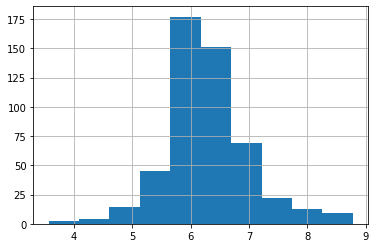

In [8]:
# original histogram
df["RM"].hist()

<AxesSubplot:>

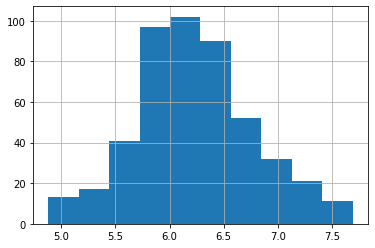

In [9]:
# histogram after removing outliers (out of iqr)
df_rm_prep["RM"].hist()

In [10]:
# original correlation
df[["RM", "MEDV"]].corr()

RM     MEDV
RM    1.00000  0.69536
MEDV  0.69536  1.00000

In [11]:
# correlation after removing outliers (out of iqr)
df_rm_prep[["RM", "MEDV"]].corr()

RM      MEDV
RM    1.000000  0.611757
MEDV  0.611757  1.000000

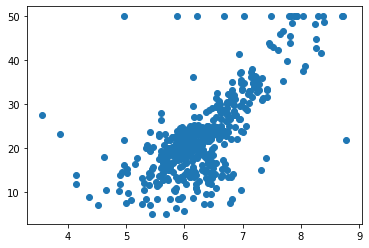

In [12]:
# original scatter plot
plt.scatter(df["RM"], df["MEDV"])

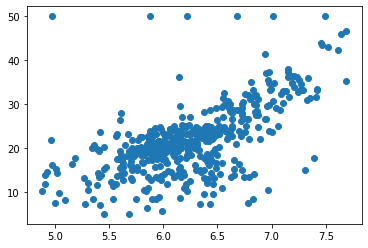

In [13]:
# scatter plot after removing outliers (out of iqr)
plt.scatter(df_rm_prep["RM"], df_rm_prep["MEDV"])

array([[<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'B_log'}>]], dtype=object)

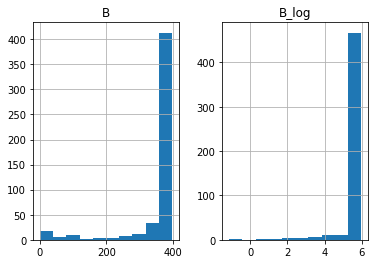

In [14]:
# log transform
df["B_log"] = np.log(df["B"])
df[["B", "B_log"]].hist()

array([[<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'B_sqrt'}>]], dtype=object)

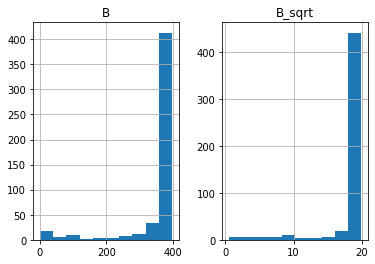

In [15]:
# sqrt transform
df["B_sqrt"] = np.sqrt(df["B"])
df[["B", "B_sqrt"]].hist()

In [16]:
# check if each cell is null
df.isnull()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False   True  False  False  False   

     PTRATIO      B  LSTAT   MEDV  B_log  B_sqrt  
0      False  False  False  False  False   False  
1      False  False  False  False  False   False  
2      False  False  False  False  False   False  
3      False  False  False  False  False   False  
4      False  False   True  False  False   False  
..       ...    ...    ...    ...    ...     ...  
501    False  False   True  False  False   False  
502    False  False  False  False  False   False  
503    False  False  False  False  False   False  
504    False  False  False  False  False   False  
505    False  False  False  False  False   False  

[506 rows x 16 columns]

In [17]:
# count null for each column (default axis = 0)
df.isnull().sum()
df.isnull().sum(axis=0)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
B_log       0
B_sqrt      0
dtype: int64

In [18]:
# count null for each row
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      1
      ..
501    1
502    0
503    0
504    0
505    1
Length: 506, dtype: int64

In [19]:
# drop row with null (default axis = 0)
df_del_null_row = df.dropna(axis=0)
print(f"{df.shape} -> {df_del_null_row.shape}")

(506, 16) -> (394, 16)


In [20]:
# drop col with null
df_del_null_col = df.dropna(axis=1)
print(f"{df.shape} -> {df_del_null_col.shape}")

(506, 16) -> (506, 10)


In [21]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
B_log       0
B_sqrt      0
dtype: int64

In [22]:
# fill null with provided value
df.fillna("missing").isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
B_log      0
B_sqrt     0
dtype: int64

In [23]:
# original state
small_df_with_null = df.loc[3:5, "LSTAT"]
small_df_with_null

3    2.94
4     NaN
5    5.21
Name: LSTAT, dtype: float64

In [24]:
# mean-fill
small_df_with_null.fillna(small_df_with_null.mean())

3    2.940
4    4.075
5    5.210
Name: LSTAT, dtype: float64

In [25]:
# median-fill
small_df_with_null.fillna(small_df_with_null.median())

3    2.940
4    4.075
5    5.210
Name: LSTAT, dtype: float64

In [26]:
# min-fill
small_df_with_null.fillna(small_df_with_null.min())

3    2.94
4    2.94
5    5.21
Name: LSTAT, dtype: float64

In [27]:
# max-fill
small_df_with_null.fillna(small_df_with_null.max())

3    2.94
4    5.21
5    5.21
Name: LSTAT, dtype: float64

In [28]:
# forward-fill
small_df_with_null.ffill()
small_df_with_null.fillna(method="ffill")
small_df_with_null.pad()
small_df_with_null.fillna(method="pad")

3    2.94
4    2.94
5    5.21
Name: LSTAT, dtype: float64

In [29]:
# after forward-fill
small_df_with_null.bfill()
small_df_with_null.fillna(method="bfill")
small_df_with_null.backfill()
small_df_with_null.fillna(method="backfill")

3    2.94
4    5.21
5    5.21
Name: LSTAT, dtype: float64

In [30]:
# original state
small_df_with_null = df.loc[3:5, ["LSTAT", "B"]]
small_df_with_null

LSTAT       B
3   2.94  394.63
4    NaN  396.90
5   5.21  394.12

In [31]:
# fillna using np.where
small_df_with_null["LSTAT_NEW"] = np.where(small_df_with_null["LSTAT"].isnull(), small_df_with_null["B"], small_df_with_null["LSTAT"])
small_df_with_null

LSTAT       B  LSTAT_NEW
3   2.94  394.63       2.94
4    NaN  396.90     396.90
5   5.21  394.12       5.21

In [32]:
# interploate pd.Series
pd.Series([1, None, None, 4, None, 7]).interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.5
5    7.0
dtype: float64

In [33]:
# count distinct RAD frequency
df["RAD"].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [34]:
# get group stat (grouping variable is RAD)
df.groupby("RAD").describe()

CRIM                                                                \
     count       mean        std      min       25%       50%        75%   
RAD                                                                        
1     20.0   0.036028   0.025439  0.00632  0.014855  0.031825   0.048700   
2     23.0   0.085163   0.077961  0.02055  0.038500  0.068600   0.106765   
3     37.0   0.097286   0.075755  0.01360  0.033590  0.068880   0.141500   
4    109.0   0.397060   0.455103  0.01381  0.078860  0.217190   0.627390   
5    112.0   0.700180   0.951632  0.01311  0.078908  0.170620   1.211460   
6     23.0   0.155567   0.070751  0.03871  0.108095  0.142310   0.200555   
7     16.0   0.154008   0.100285  0.03537  0.070060  0.152345   0.198947   
8     22.0   0.361430   0.168906  0.10328  0.203330  0.370115   0.499613   
24   124.0  13.011278  13.382278  2.37857  5.704072  9.209660  14.355475   

                  ZN             ...     B_log           B_sqrt             \
          max  count       mean  ...       75%       max  count       mean   
RAD                              ...                                         
1     0.10959   18.0  40.166667  ...  5.981072  5.983684   20.0  19.726854   
2     0.38735   24.0  20.416667  ...  5.982095  5.983684   24.0  19.654487   
3     0.29916   37.0  16.824324  ...  5.983684  5.983684   38.0  19.808925   
4     2.63548  104.0  14.543269  ...  5.983684  5.983684  110.0  19.546083   
5     4.09740  111.0  11.328829  ...  5.980252  5.983684  115.0  19.108031   
6     0.28960   24.0  12.812500  ...  5.983684  5.983684   26.0  19.677618   
7     0.36894   15.0  25.733333  ...  5.980783  5.983684   17.0  19.707570   
8     0.62356   24.0   6.250000  ...  5.972663  5.983684   24.0  19.627072   
24   88.97620  129.0   0.000000  ...  5.979626  5.983684  132.0  15.888886   

                                                                      
          std        min        25%        50%        75%        max  
RAD                                                                   
1    0.361598  18.482424  19.785904  19.858749  19.896351  19.922349  
2    0.346258  18.823124  19.469394  19.811990  19.906529  19.922349  
3    0.158251  19.094764  19.769357  19.863157  19.922349  19.922349  
4    0.823443  15.251229  19.601964  19.837842  19.922349  19.922349  
5    2.027639   8.414274  19.432447  19.777007  19.888187  19.922349  
6    0.405234  18.401902  19.621850  19.863660  19.922349  19.922349  
7    0.217724  19.300000  19.585964  19.759302  19.893466  19.922349  
8    0.240711  18.978936  19.449486  19.663282  19.812903  19.922349  
24   5.992034   0.565685  12.910365  19.332345  19.881964  19.922349  

[9 rows x 120 columns]

In [35]:
# get group mean (grouping variable is RAD)
df.groupby("RAD").mean()

CRIM         ZN      INDUS      CHAS       NOX        RM        AGE  \
RAD                                                                             
1     0.036029  40.166667   5.066000  0.052632  0.462890  6.555850  45.782353   
2     0.085163  20.416667   8.934348  0.000000  0.484917  6.649958  63.430435   
3     0.097286  16.824324   4.351622  0.054054  0.452424  6.473026  49.310526   
4     0.397060  14.543269  10.714434  0.074766  0.504311  6.133118  60.842453   
5     0.700180  11.328829   9.736019  0.089286  0.570883  6.393157  69.187037   
6     0.155567  12.812500   8.198077  0.000000  0.514846  6.104731  60.142308   
7     0.154008  25.733333   5.170000  0.000000  0.441000  6.647765  40.141176   
8     0.361430   6.250000   5.932500  0.208333  0.492500  6.950792  67.217391   
24   13.011278   0.000000  18.100000  0.065041  0.672417  6.022152  89.651562   

          DIS         TAX    PTRATIO           B      LSTAT       MEDV  \
RAD                                                                      
1    6.027825  291.450000  17.565000  389.273000   7.403529  24.365000   
2    4.097008  260.666667  17.291667  386.413750  10.024583  26.833333   
3    5.146492  246.078947  18.168421  392.417895   9.272286  27.928947   
4    4.433000  335.981818  19.136364  382.721273  12.262991  21.387273   
5    3.697329  331.843478  16.546957  369.192435  10.679646  25.706957   
6    4.024915  372.884615  17.815385  387.366538  12.316400  20.976923   
7    6.495859  304.411765  18.405882  388.432941   7.988235  27.105882   
8    4.410604  301.250000  17.975000  385.277500   8.364091  30.358333   
24   2.061254  666.000000  20.200000  288.089167  18.587778  16.403788   

        B_log     B_sqrt  
RAD                       
1    5.963632  19.726854  
2    5.956309  19.654487  
3    5.972202  19.808925  
4    5.943593  19.546083  
5    5.884128  19.108031  
6    5.958544  19.677618  
7    5.961890  19.707570  
8    5.953675  19.627072  
24   5.232074  15.888886

In [36]:
# replace null with group mean
df.groupby("RAD").apply(lambda g: g.fillna(g.mean()))

CRIM    ZN  INDUS      CHAS    NOX     RM        AGE     DIS  RAD  \
RAD                                                                             
1   0    0.00632  18.0   2.31  0.000000  0.538  6.575  65.200000  4.0900    1   
    193  0.02187  60.0   2.93  0.000000  0.401  6.800  45.782353  6.2196    1   
    194  0.01439  60.0   2.93  0.000000  0.401  6.604  18.800000  6.2196    1   
    254  0.04819  80.0   3.64  0.052632  0.392  6.108  32.000000  9.2203    1   
    255  0.03548  80.0   3.64  0.000000  0.392  5.876  19.100000  9.2203    1   
...          ...   ...    ...       ...    ...    ...        ...     ...  ...   
24  483  2.81838   0.0  18.10  0.000000  0.532  5.762  40.300000  4.0983   24   
    484  2.37857   0.0  18.10  0.000000  0.583  5.871  41.900000  3.7240   24   
    485  3.67367   0.0  18.10  0.000000  0.583  6.312  51.900000  3.9917   24   
    486  5.69175   0.0  18.10  0.000000  0.583  6.114  79.800000  3.5459   24   
    487  4.83567   0.0  18.10  0.000000  0.583  5.905  53.200000  3.1523   24   

         TAX  PTRATIO       B  LSTAT  MEDV     B_log     B_sqrt  
RAD                                                              
1   0    296     15.3  396.90   4.98  24.0  5.983684  19.922349  
    193  265     15.6  393.37   5.03  31.1  5.974751  19.833557  
    194  265     15.6  376.70   4.38  29.1  5.931449  19.408761  
    254  315     16.4  392.89   6.57  21.9  5.973530  19.821453  
    255  315     16.4  395.18   9.25  20.9  5.979341  19.879135  
...      ...      ...     ...    ...   ...       ...        ...  
24  483  666     20.2  392.92  10.42  21.8  5.973606  19.822210  
    484  666     20.2  370.73  13.34  20.6  5.915474  19.254350  
    485  666     20.2  388.62  10.58  21.2  5.962602  19.713447  
    486  666     20.2  392.68  14.98  19.1  5.972995  19.816155  
    487  666     20.2  388.22  11.45  20.6  5.961572  19.703299  

[506 rows x 16 columns]

In [37]:
# fill null in each columns separately
null_fill_val = {
    "CRIM": df["CRIM"].mean(),
    "ZN": df["ZN"].interpolate(),
    "INDUS": "missing"
}
null_fill_val

{'CRIM': 3.6118739711934156,
 'ZN': 0      18.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 501     0.0
 502     0.0
 503     0.0
 504     0.0
 505     0.0
 Name: ZN, Length: 506, dtype: float64,
 'INDUS': 'missing'}

In [38]:
df.fillna(null_fill_val).describe()

CRIM          ZN        CHAS         NOX          RM         AGE  \
count  506.000000  506.000000  486.000000  506.000000  506.000000  486.000000   
mean     3.611874   11.419960    0.069959    0.554695    6.284634   68.518519   
std      8.545770   23.231082    0.255340    0.115878    0.702617   27.999513   
min      0.006320    0.000000    0.000000    0.385000    3.561000    2.900000   
25%      0.083235    0.000000    0.000000    0.449000    5.885500   45.175000   
50%      0.290250    0.000000    0.000000    0.538000    6.208500   76.800000   
75%      3.611874   13.625000    0.000000    0.624000    6.623500   93.975000   
max     88.976200  100.000000    1.000000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  486.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.715432   
std      2.105710    8.707259  168.537116    2.164946   91.294864    7.155871   
min      1.129600    1.000000  187.000000   12.600000    0.320000    1.730000   
25%      2.100175    4.000000  279.000000   17.400000  375.377500    7.125000   
50%      3.207450    5.000000  330.000000   19.050000  391.440000   11.430000   
75%      5.188425   24.000000  666.000000   20.200000  396.225000   16.955000   
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   

             MEDV       B_log      B_sqrt  
count  506.000000  506.000000  506.000000  
mean    22.532806    5.749869   18.540526  
std      9.197104    0.773471    3.598405  
min      5.000000   -1.139434    0.565685  
25%     17.025000    5.927932   19.374661  
50%     21.200000    5.969832   19.784843  
75%     25.000000    5.981982   19.905401  
max     50.000000    5.983684   19.922349

In [39]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV       B_log      B_sqrt  
count  486.000000  506.000000  506.000000  506.000000  
mean    12.715432   22.532806    5.749869   18.540526  
std      7.155871    9.197104    0.773471    3.598405  
min      1.730000    5.000000   -1.139434    0.565685  
25%      7.125000   17.025000    5.927932   19.374661  
50%     11.430000   21.200000    5.969832   19.784843  
75%     16.955000   25.000000    5.981982   19.905401  
max     37.970000   50.000000    5.983684   19.922349